# Supervised (KNN) IBM capstone project 

## Notebook Summary:

This notebook describes how the KNN algorithm can be used to generate course recommendations. The main dataset used is 'course_ratings.csv'

The classification model operates by:
- Reading the required csv file(s)
- Defining a function to compute the silhouette score
- Defining a function that uses the user's profile vector and the vectors of unknown courses to generate recommendation scores for each test user in the test user ids (i.e., courses that the user has not yet enrolled in)
- Executing the functions
- Generating the top 10 recommended courses, the average number of course recommendations per user, and performance metrics of the model itself.
- A flowchart that outlines the model is included below.

In [1]:
from surprise import KNNBasic
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from collections import defaultdict
from surprise.model_selection import KFold
import numpy as np
import pandas as pd


In [2]:
# Load data
rating_df = pd.read_csv('ratings.csv')

# Use surprise library
# Prepare data
reader = Reader(
        line_format='user item rating', sep=',', skip_lines=1, rating_scale=(2, 3))
course_dataset = Dataset.load_from_file("course_ratings.csv", reader=reader)

# Use surprise library
# Test train split
trainset, testset = train_test_split(course_dataset, test_size=.25)

In [4]:
def precision_recall_at_k(predictions, k=10, threshold=2.5):
    """
    Return precision and recall at k metrics for each user
    """
    user_est_true = defaultdict(list)
    # Map the predictions to each user
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = {}
    recalls = {}
    for uid, user_ratings in user_est_true.items():
        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        # Number of relevant items
        n_rel = sum(true_r >= threshold for _, true_r in user_ratings)
        # Number of recommended items in top k
        n_rec_k = sum(est >= threshold for est, _ in user_ratings[:k])
        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(
            true_r >= threshold and est >= threshold
            for est, true_r in user_ratings[:k]
        )
        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set it to 0.
        precisions[uid] = (
            n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0
        )
        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set it to 0.
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    return precisions, recalls


In [5]:
#Get average precision and recalls
def average_dicts(dictionary):
    sum = 0
    count = 0
    for value in dictionary.values():
        sum += value
        count += 1
    return sum / count



In [6]:
# Create the KNNBasic model with the optimal value of k
knn_1 = KNNBasic(k=10, sim_options = {'name': 'msd'})

# Fit the KNNBasic model to the entire training set
knn_1.fit(trainset)

# Predict ratings for the test set
predictions_1 = knn_1.test(testset)

precisions, recalls = precision_recall_at_k(predictions = predictions_1, k=10, threshold=2.5)

# Get average Precision and recalls
precision_average = average_dicts(precisions)
recalls_average = average_dicts(recalls)


#f1 value
f1_model_1 = 2 * (precision_average * recalls_average) / (precision_average + recalls_average)


Computing the msd similarity matrix...
Done computing similarity matrix.


In [11]:
del knn_1, predictions_1
del recalls_average
del precision_average

In [7]:
## Model 2 -> cosine


# Create the KNNBasic model with the optimal value of k
knn_2 = KNNBasic(k=10, sim_options = {'name': 'cosine'})

# Fit the KNNBasic model to the entire training set
knn_2.fit(trainset)

# Predict ratings for the test set
predictions_2 = knn_2.test(testset)

#Precision and recall
precisions, recalls = precision_recall_at_k(predictions = predictions_2, k=10, threshold=2.5)

# Get average Precision and recalls
precision_average = average_dicts(precisions)
recalls_average = average_dicts(recalls)

#f1_model
f1_model_2 = 2 * (precision_average * recalls_average) / (precision_average + recalls_average)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [12]:
del knn_2, predictions_2
del recalls_average
del precision_average

In [15]:
# Create the KNNBasic model with the optimal value of k
knn_3 = KNNBasic(k=10, sim_options = {'name': 'pearson'})

# Fit the KNNBasic model to the entire training set
knn_3.fit(trainset)

# Predict ratings for the test set
predictions_3 = knn_3.test(testset)

#Precision and recall
precisions, recalls = precision_recall_at_k(predictions = predictions_3, k=10, threshold=2.5)

# Get average Precision and recalls
precision_average = average_dicts(precisions)
recalls_average = average_dicts(recalls)

#f1_model
f1_model_3 = 2 * (precision_average * recalls_average) / (precision_average + recalls_average)

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
f1_values = [f1_model_1, f1_model_2, f1_model_3]

maximum = max(f1_values)
position = f1_values.index(maximum)
print(maximum)
print(f1_values[position])


0.8997113214748622
0.8997113214748622


In [17]:
print(min(f1_values[0], f1_values[1], f1_values[2]))
print(max(f1_values[0], f1_values[1], f1_values[2]))



0.8991979973335611
0.8997113214748622


[]

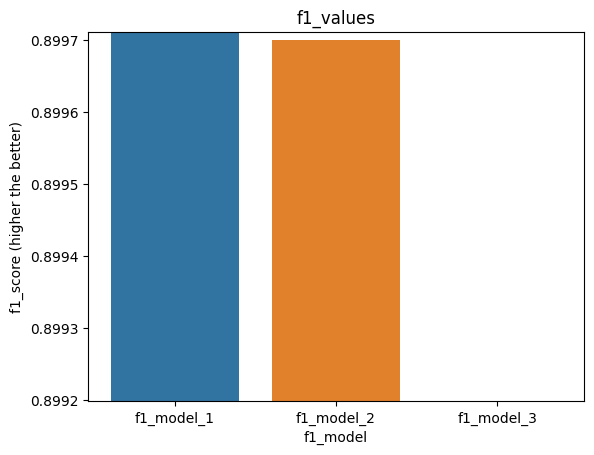

In [21]:
#F1 keys
f1_names = ["f1_model_1", "f1_model_2", "f1_model_3"]
# create a dataframe with the values and names
df_f1 = pd.DataFrame({'f1_score (higher the better)': f1_values, 'f1_model': f1_names})

# use seaborn to plot the bar chart
sns.barplot(x='f1_model', y='f1_score (higher the better)', data=df_f1)
plt.ylim(min(f1_values[0], f1_values[1], f1_values[2]), max(f1_values[0], f1_values[1], f1_values[2]))
plt.title('f1_values')
plt.plot()


In [ ]:
f1_values

[0.9040273617866051, 0.9040267862122666, 0.9040308861197852]